<a href="https://colab.research.google.com/github/nhi-huynhyen/OLAP/blob/main/OLAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

# Gắn kết Google Drive
drive.mount('/content/drive')

# Đường dẫn đến file hotel_booking.csv
file_path = '/content/drive/My Drive/Kho dữ liệu và OLAP/hotel_booking.csv'

# Đọc file CSV
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [ ]:
df['children'] = df['children'].fillna(0)

In [ ]:
df = df.dropna(subset=['country'])

In [ ]:
df['country'].value_counts()

,count
country,
PRT,48590
GBR,12129
FRA,10415
ESP,8568
DEU,7287
...,...
DJI,1
BWA,1
HND,1


In [ ]:
!pip install pycountry
!pip install pycountry-convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 kB 11.3 MB/s eta 0:00:00


In [ ]:
import pycountry
import pycountry_convert as pc

In [ ]:
def convert_country_code(country):
    alpha2_code = None
    try:
        if len(country) == 3:
            country_obj = pycountry.countries.get(alpha_3=country)
            if country_obj is None:
                return "Invalid code"
            alpha2_code = country_obj.alpha_2
        elif len(country) == 2:
            country_obj = pycountry.countries.get(alpha_2=country)
            if country_obj is None:
                return "Invalid code"
            alpha2_code = country
        continent = pc.country_alpha2_to_continent_code(alpha2_code)
        return continent
    except KeyError:
        return "Invalid code"

In [ ]:
df['continent'] = df['country'].apply(convert_country_code)

In [ ]:
df['continent'].value_counts()

,count
continent,
EU,107826
AS,4468
SA,2708
NA,2274
AF,1113
OC,506
Invalid code,7


In [ ]:
df[df['continent']=='Invalid code']['country']

,country
61458,TMP
68227,UMI
81331,TMP
91991,TMP
99598,ATA
104762,ATA
115334,ATF


In [ ]:
df.loc[df['continent']=='Invalid code', 'continent'] = df['country'].map({'TMP':'AS','UMI':'OC','ATA':'OC','ATF':'OC'})

In [ ]:

df['company'].value_counts()

,count
company,
40.0,927
223.0,784
67.0,267
45.0,250
153.0,215
...,...
10.0,1
100.0,1
96.0,1


In [ ]:
df['continent'].value_counts()


,count
continent,
EU,107826
AS,4471
SA,2708
NA,2274
AF,1113
OC,510


In [ ]:

df['agent'].value_counts()


,count
agent,
9.0,31960
240.0,13871
1.0,7191
14.0,3639
7.0,3539
...,...
70.0,1
93.0,1
54.0,1


In [ ]:
df = df.drop(['agent','company'],axis=1)

In [ ]:
df.select_dtypes(['object']).columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'name', 'email', 'phone-number',
       'credit_card', 'continent'],
      dtype='object')

In [ ]:
df['hotel'].value_counts()

,count
hotel,
City Hotel,79306
Resort Hotel,39596


In [ ]:
df['arrival_date_month'].value_counts()

,count
arrival_date_month,
August,13856
July,12628
May,11779
October,11095
April,11045
June,10927
September,10467
March,9739
February,8012


In [ ]:
df['meal'].value_counts()

,count
meal,
BB,91867
HB,14434
SC,10638
Undefined,1165
FB,798


In [ ]:
df['market_segment'].value_counts()

,count
market_segment,
Online TA,56403
Offline TA/TO,24160
Groups,19806
Direct,12449
Corporate,5111
Complementary,734
Aviation,237
Undefined,2


In [ ]:
df['distribution_channel'].value_counts()

,count
distribution_channel,
TA/TO,97730
Direct,14483
Corporate,6491
GDS,193
Undefined,5


In [ ]:
df['reserved_room_type'].value_counts()

,count
reserved_room_type,
A,85601
D,19173
E,6497
F,2890
G,2083
B,1118
C,931
H,601
L,6


In [ ]:
df['assigned_room_type'].value_counts()

,count
assigned_room_type,
A,73863
D,25166
E,7738
F,3732
G,2539
C,2354
B,2163
H,708
I,357


In [ ]:
df['deposit_type'].value_counts()

,count
deposit_type,
No Deposit,104167
Non Refund,14573
Refundable,162


In [ ]:
df['customer_type'].value_counts()

,count
customer_type,
Transient,89174
Transient-Party,25082
Contract,4076
Group,570


In [ ]:
df['reservation_status'].value_counts()

,count
reservation_status,
Check-Out,74745
Canceled,42954
No-Show,1203


In [ ]:
df['reservation_status_date'].value_counts()

,count
reservation_status_date,
2015-10-21,1461
2015-07-06,805
2016-11-25,790
2015-01-01,763
2016-01-18,625
...,...
2015-03-30,1
2015-04-25,1
2015-03-11,1


In [ ]:
df = df.drop(['assigned_room_type','reservation_status','reservation_status_date','country'],axis=1)

In [ ]:
dummies = pd.get_dummies(df[['hotel','arrival_date_month','meal','market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type','continent']],drop_first=True)

In [ ]:
df = pd.concat([df.drop(['hotel','arrival_date_month','meal','market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type','continent'],axis=1),dummies],axis=1)

In [ ]:
df = df.drop(['name','email','phone-number','credit_card'],axis=1)

In [ ]:
df = df.drop(['arrival_date_year','arrival_date_week_number','arrival_date_day_of_month'],axis=1)

In [ ]:
df

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,continent_AS,continent_EU,continent_NA,continent_OC,continent_SA
0,0,342,0,0,2,0.0,0,0,0,0,...,False,False,False,True,False,False,True,False,False,False
1,0,737,0,0,2,0.0,0,0,0,0,...,False,False,False,True,False,False,True,False,False,False
2,0,7,0,1,1,0.0,0,0,0,0,...,False,False,False,True,False,False,True,False,False,False
3,0,13,0,1,1,0.0,0,0,0,0,...,False,False,False,True,False,False,True,False,False,False
4,0,14,0,2,2,0.0,0,0,0,0,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2,5,2,0.0,0,0,0,0,...,False,False,False,True,False,False,True,False,False,False
119386,0,102,2,5,3,0.0,0,0,0,0,...,False,False,False,True,False,False,True,False,False,False
119387,0,34,2,5,2,0.0,0,0,0,0,...,False,False,False,True,False,False,True,False,False,False
119388,0,109,2,5,2,0.0,0,0,0,0,...,False,False,False,True,False,False,True,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
X = df.drop('is_canceled',axis=1).values
y = df['is_canceled'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
rfc = RandomForestClassifier(n_estimators=300)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

In [ ]:
predictions = rfc.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     22530
           1       0.85      0.75      0.80     13141

    accuracy                           0.86     35671
   macro avg       0.86      0.84      0.84     35671
weighted avg       0.86      0.86      0.86     35671



In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 85.90%


In [ ]:
from sklearn.tree import export_text
import pandas as pd

def extract_relevant_rules(rf_model, feature_names, max_depth=3):
    relevant_rules = []
    for i, tree in enumerate(rf_model.estimators_):
        # Trích xuất luật từ từng cây
        tree_rules = export_text(tree, feature_names=feature_names, max_depth=max_depth)
        current_rule = []
        for line in tree_rules.split("\n"):
            line = line.strip()
            # Bỏ qua các nhánh bị cắt ngắn
            if "truncated branch" in line:
                continue
            if "class:" in line:  # Nếu gặp kết quả class, hoàn thành luật
                current_rule.append(line)
                relevant_rules.append(" AND ".join(current_rule))
                current_rule = []  # Reset cho cây tiếp theo
            elif "|---" in line:  # Xây dựng điều kiện luật
                condition = line.split("|---")[-1].strip()
                current_rule.append(condition)
    return relevant_rules

# Lấy danh sách các đặc trưng
feature_names = df.drop('is_canceled', axis=1).columns.tolist()



In [ ]:
def clean_rf_rules(raw_rules):

    cleaned_rules = []

    for rule in raw_rules:
        # Bỏ qua các luật không có điều kiện hoặc không có "class:"
        if "class:" not in rule or not rule.strip():
            continue

        # Tách điều kiện và kết quả (class)
        parts = rule.split(" AND ")
        conditions = []
        class_label = None
        seen_conditions = {}

        # Duyệt qua từng điều kiện
        for part in parts:
            part = part.strip()

            # Phân loại các điều kiện và nhãn lớp
            if "class:" in part:
                class_label = part
                continue

            # Kiểm tra điều kiện hợp lệ (dạng feature operator value)
            if any(op in part for op in ["<=", ">", "<"]):
                try:
                    feature, operator, threshold = part.split(" ")[0], part.split(" ")[1], part.split(" ")[2]
                    threshold = float(threshold)

                    # Loại bỏ các điều kiện mâu thuẫn
                    if feature in seen_conditions:
                        existing_operator, existing_threshold = seen_conditions[feature]

                        # Kiểm tra mâu thuẫn
                        if (existing_operator == "<=" and operator == ">" and threshold <= existing_threshold) or \
                           (existing_operator == ">" and operator == "<=" and threshold >= existing_threshold):
                            conditions = []  # Toàn bộ luật bị mâu thuẫn, loại bỏ
                            break

                        # Loại bỏ điều kiện dư thừa
                        if (existing_operator == "<=" and operator == "<=" and threshold < existing_threshold) or \
                           (existing_operator == ">" and operator == ">" and threshold > existing_threshold):
                            seen_conditions[feature] = (operator, threshold)
                        continue

                    # Thêm điều kiện mới nếu không mâu thuẫn
                    seen_conditions[feature] = (operator, threshold)
                    conditions.append(part)
                except (ValueError, IndexError):
                    # Bỏ qua các điều kiện không hợp lệ
                    continue
            else:
                # Thêm các điều kiện khác không cần kiểm tra
                conditions.append(part)

        # Chỉ giữ lại luật nếu không bị mâu thuẫn và có điều kiện hợp lệ
        if conditions and class_label:
            cleaned_rule = " AND ".join(conditions) + f" {class_label}"
            if cleaned_rule not in cleaned_rules:
                cleaned_rules.append(cleaned_rule)

    return cleaned_rules


In [ ]:
import numpy as np

# Lấy độ quan trọng của các thuộc tính
importances = rfc.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sắp xếp các thuộc tính theo độ quan trọng giảm dần
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# In ra các thuộc tính có độ quan trọng cao nhất
print(feature_importances_df.head(10))

                        Feature  Importance
0                     lead_time    0.193206
11                          adr    0.136090
50      deposit_type_Non Refund    0.116937
13    total_of_special_requests    0.066617
2          stays_in_week_nights    0.057839
7        previous_cancellations    0.043998
1       stays_in_weekend_nights    0.034837
9               booking_changes    0.024322
12  required_car_parking_spaces    0.022282
33        market_segment_Groups    0.021079


In [ ]:
# Lấy top 4 thuộc tính quan trọng nhất
top_features = feature_importances_df.head(4)['Feature'].tolist()

# Lọc dữ liệu chỉ với các thuộc tính quan trọng nhất
df_top_features = df[top_features + ['is_canceled']]

In [ ]:
# Chuyển đổi các biến phân loại thành biến giả (dummy variables)
dummies = pd.get_dummies(df_top_features, drop_first=True)

# Chia thành biến đầu vào và biến mục tiêu
X_top = dummies.drop('is_canceled', axis=1)
y_top = dummies['is_canceled']

# Huấn luyện lại mô hình RandomForestClassifier với dữ liệu đã lọc
rfc_top = RandomForestClassifier(random_state=42)
rfc_top.fit(X_top, y_top)

# Trích xuất các luật từ mô hình mới chỉ với các thuộc tính quan trọng nhất
filtered_rules_top = extract_relevant_rules(rfc_top, X_top.columns.tolist(), max_depth=3)
# Làm sạch tập luật
cleaned_rules = clean_rf_rules(filtered_rules_top)
# In ra các luật
for i, rule in enumerate(cleaned_rules, 1):
    print(f"Rule {i}: {rule}")

Rule 1: lead_time <= 8.50 AND adr <= 76.10 AND total_of_special_requests <= 0.50 |   |   |   |--- class: 0.0
Rule 2: total_of_special_requests <= 0.50 AND adr <= 95.69 AND lead_time <= 14.50 |   |   |--- class: 0.0
Rule 3: lead_time <= 8.50 AND adr <= 56.83 AND total_of_special_requests <= 0.50 |   |   |   |--- class: 1.0
Rule 4: lead_time <= 10.50 AND total_of_special_requests <= 0.50 AND adr <= 54.75 |   |   |--- class: 0.0
Rule 5: lead_time <= 17.50 AND adr <= 76.27 |   |   |   |   |--- class: 1.0
Rule 6: adr <= 109.50 |   |   |   |   |--- class: 0.0
Rule 7: lead_time <= 92.50 AND total_of_special_requests <= 0.50 AND adr <= 132.28 |   |   |   |   |--- class: 0.0
Rule 8: lead_time <= 216.50 |   |   |   |   |--- class: 1.0
Rule 9: lead_time <= 17.50 AND total_of_special_requests <= 0.50 AND adr <= 117.02 |   |   |   |   |--- class: 0.0
Rule 10: lead_time <= 257.50 AND adr <= 74.78 |   |   |   |--- class: 1.0
Rule 11: lead_time <= 21.50 AND adr <= 96.46 AND total_of_special_requests <

In [ ]:
def export_rules_to_excel(rules, file_name="/content/drive/My Drive/Kho dữ liệu và OLAP/rules_RandomForest.xlsx"):
    """
    Xuất các luật đã làm sạch ra file Excel.

    Parameters:
        rules (list): Danh sách các luật.
        file_name (str): Tên file Excel để lưu.
    """
    # Tạo DataFrame từ danh sách các luật
    df = pd.DataFrame({"Rules": rules})

    # Xuất ra file Excel
    df.to_excel(file_name, index=False)

# Xuất các luật ra file Excel
export_rules_to_excel(cleaned_rules, "/content/drive/My Drive/Kho dữ liệu và OLAP/rules_RandomForest.xlsx")

In [ ]:
print("Actual vs Predicted:")
for actual, predicted in zip(y_test, predictions):
    print(f"Actual: {actual}, Predicted: {predicted}")

Streaming output truncated to the last 5000 lines.
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 1, Predicted: 1
Actual: 1, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Pr

In [ ]:
from google.colab import drive
import pandas as pd

# Gắn kết Google Drive
drive.mount('/content/drive')

# Đường dẫn đến file hotel_booking.csv
file_path = '/content/drive/My Drive/Kho dữ liệu và OLAP/rules_randomforest.csv'

# Đọc file CSV
df = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df['Extracted Attributes'] = df['Rules'].str.split(' AND ')

df_exploded = df.explode('Extracted Attributes')

pivot_table = pd.crosstab(df_exploded['Extracted Attributes'], df_exploded['Class'])

pivot_table

Class,0,1
Extracted Attributes,,
adr <= 100.28,1,0
adr <= 100.40,1,1
adr <= 103.00,1,0
adr <= 104.30,2,0
adr <= 104.64,1,0
...,...,...
lead_time <= 8.50,5,2
lead_time <= 9.50,3,0
lead_time <= 92.50,1,0


In [ ]:
output_path = '/content/drive/My Drive/ĐỒ ÁN OLAP/pivot_rules_randomforest.xlsx'
pivot_table.to_excel(output_path)

output_path

'/content/drive/My Drive/ĐỒ ÁN OLAP/pivot_rules_randomforest.xlsx'

<ipython-input-45-48e1fe2c6100>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=match_counts.index, y=match_counts.values, palette='viridis')


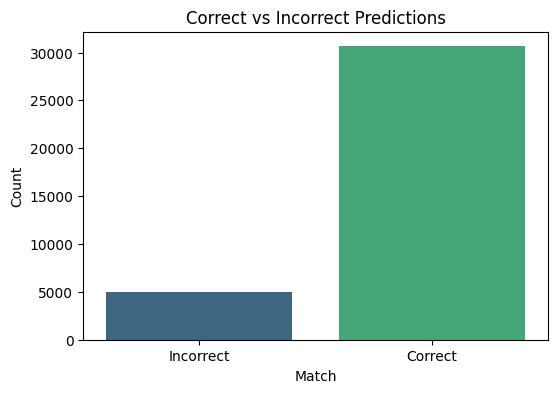

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Tạo DataFrame với Actual và Predicted
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Tạo cột để kiểm tra dự đoán đúng/sai
comparison_df['Match'] = comparison_df['Actual'] == comparison_df['Predicted']

# Tính toán số lượng đúng/sai
match_counts = comparison_df['Match'].value_counts()

# Trực quan hóa số lượng
plt.figure(figsize=(6, 4))
sns.barplot(x=match_counts.index, y=match_counts.values, palette='viridis')
plt.xticks([0, 1], ['Incorrect', 'Correct'])
plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions')
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('is_canceled', axis=1).values
y = df['is_canceled'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Tạo mô hình XGBoost
model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=300,
    max_depth=15,
    learning_rate=0.1,
    subsample = 0.8,
    random_state=42
)

In [ ]:
model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

              precision    recall  f1-score   support

           0       0.87      0.92      0.89     14817
           1       0.86      0.76      0.81      8964

    accuracy                           0.86     23781
   macro avg       0.86      0.84      0.85     23781
weighted avg       0.86      0.86      0.86     23781

Accuracy on test set: 86.26%


In [ ]:
# Tính độ quan trọng của các thuộc tính
feature_importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Chọn top 5 thuộc tính có độ quan trọng cao nhất
top_features = importance_df.head(5)

# In ra danh sách các thuộc tính được chọn
print("Top 5 features:")
print(top_features[['Feature', 'Importance']])

Top 5 features:
                           Feature  Importance
50         deposit_type_Non Refund    0.769930
12     required_car_parking_spaces    0.091248
7           previous_cancellations    0.041706
35        market_segment_Online TA    0.006526
8   previous_bookings_not_canceled    0.004001


In [ ]:
def extract_rules_from_xgboost(tree_dump, feature_names, top_features):
    rules = set()  # Dùng set để tự động loại bỏ luật trùng lặp
    for tree in tree_dump:
        current_rule = []
        for line in tree.split("\n"):
            if "leaf=" in line:  # Lá cây chứa giá trị dự đoán
                value = line.split("leaf=")[-1].strip()
                predicted_class = 1 if float(value) > 0 else 0
                if current_rule:  # Chỉ thêm luật khi có điều kiện
                    # Loại bỏ các điều kiện lặp lại hoặc không cần thiết
                    simplified_rule = simplify_rule(current_rule)
                    rule_str = " AND ".join(simplified_rule) + f" -> Class: {predicted_class}"
                    rules.add(rule_str)  # Thêm vào set để loại bỏ trùng lặp
                current_rule = []  # Reset luật sau khi gặp lá cây
            elif "[" in line and "]" in line:  # Điều kiện
                condition = line.split("[")[-1].split("]")[0]
                feature, threshold = condition.split("<")
                if feature.startswith("f"):
                    feature_idx = int(feature[1:])
                    if feature_idx in top_features:  # Kiểm tra nếu thuộc tính nằm trong top_features
                        feature_name = feature_names[feature_idx]
                        current_rule.append((feature_name, float(threshold)))  # Lưu dưới dạng tuple (tên thuộc tính, ngưỡng)
    return list(rules)  # Chuyển set thành list để trả về

def simplify_rule(rule):
    # Hàm này loại bỏ các điều kiện lặp lại và chỉ giữ ngưỡng nhỏ nhất cho mỗi thuộc tính
    simplified_rule = {}
    for condition in rule:
        feature, threshold = condition
        if feature not in simplified_rule or threshold < simplified_rule[feature]:
            simplified_rule[feature] = threshold
    return [f"{feature} < {threshold}" for feature, threshold in simplified_rule.items()]

# Danh sách các thuộc tính có độ quan trọng cao nhất
top_features_indices = [50, 12, 7, 35, 8]

# Trích xuất luật thô từ XGBoost
tree_dump = model.get_booster().get_dump()
raw_rules = extract_rules_from_xgboost(tree_dump, feature_names, top_features_indices)

# In tập luật
for i, rule in enumerate(raw_rules, 1):
    print(f"Rule {i}: {rule}")


Rule 1: previous_bookings_not_canceled < 5.0 AND market_segment_Online TA < 1.0 -> Class: 1
Rule 2: previous_bookings_not_canceled < 22.0 -> Class: 1
Rule 3: deposit_type_Non Refund < 1.0 AND required_car_parking_spaces < 1.0 AND previous_cancellations < 1.0 -> Class: 1
Rule 4: previous_bookings_not_canceled < 2.0 -> Class: 0
Rule 5: previous_bookings_not_canceled < 25.0 -> Class: 1
Rule 6: previous_bookings_not_canceled < 1.0 AND market_segment_Online TA < 1.0 -> Class: 1
Rule 7: previous_bookings_not_canceled < 26.0 AND previous_cancellations < 1.0 -> Class: 0
Rule 8: previous_bookings_not_canceled < 10.0 -> Class: 1
Rule 9: deposit_type_Non Refund < 1.0 AND required_car_parking_spaces < 1.0 AND previous_bookings_not_canceled < 1.0 -> Class: 0
Rule 10: previous_cancellations < 1.0 AND market_segment_Online TA < 1.0 AND required_car_parking_spaces < 1.0 -> Class: 0
Rule 11: previous_bookings_not_canceled < 6.0 AND market_segment_Online TA < 1.0 -> Class: 1
Rule 12: previous_bookings_n

In [ ]:
export_rules_to_excel(raw_rules, "/content/drive/My Drive/Kho dữ liệu và OLAP/rules_XGBoost.xlsx")

In [ ]:
# Gắn kết Google Drive
drive.mount('/content/drive')

# Đường dẫn đến file hotel_booking.csv
file_path = '/content/drive/My Drive/Kho dữ liệu và OLAP/rules_xgboost.csv'

# Đọc file CSV
df_xg = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_xg['Extracted Attributes(XGBoost)'] = df_xg['Rules'].str.split(' AND ')

df_exploded_xg = df_xg.explode('Extracted Attributes(XGBoost)')

pivot_table_xg = pd.crosstab(df_exploded_xg['Extracted Attributes(XGBoost)'], df_exploded_xg['Class'])

pivot_table_xg

Class,0,1
Extracted Attributes(XGBoost),,
deposit_type_Non Refund < 1.0,14,14
market_segment_Online TA < 1.0,23,13
previous_bookings_not_canceled < 1.0,15,12
previous_bookings_not_canceled < 10.0,2,2
previous_bookings_not_canceled < 11.0,1,1
previous_bookings_not_canceled < 12.0,1,1
previous_bookings_not_canceled < 13.0,1,0
previous_bookings_not_canceled < 14.0,1,0
previous_bookings_not_canceled < 15.0,0,1


In [ ]:
output_path_xg = '/content/drive/My Drive/ĐỒ ÁN OLAP/pivot_rules_xgboost.xlsx'
pivot_table_xg.to_excel(output_path_xg)

output_path_xg

'/content/drive/My Drive/ĐỒ ÁN OLAP/pivot_rules_xgboost.xlsx'

In [ ]:
print("Actual vs Predicted:")
for actual, predicted in zip(y_test, y_pred):
    print(f"Actual: {actual}, Predicted: {predicted}")

Streaming output truncated to the last 5000 lines.
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 1
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 1, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 1
Actual: 1, Pr

<Axes: xlabel='lead_time', ylabel='Count'>

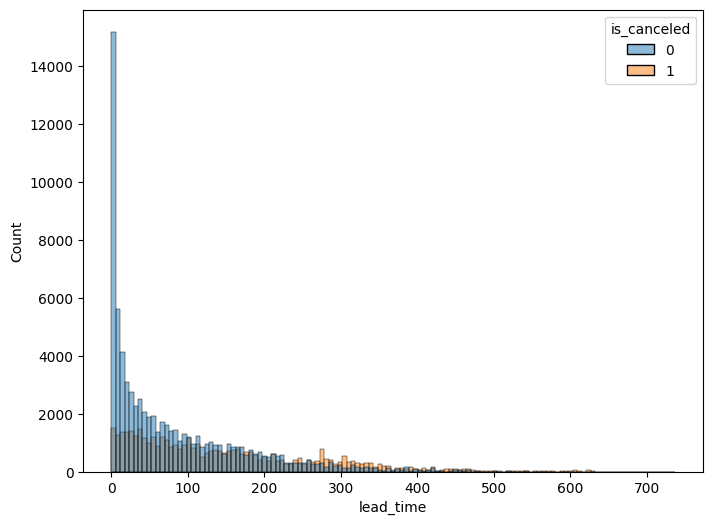

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data=df,x='lead_time',hue='is_canceled')

<Axes: xlabel='is_canceled', ylabel='count'>

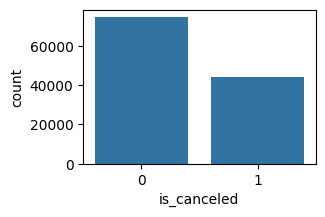

In [ ]:
plt.figure(figsize=(3,2))
sns.countplot(data=df,x='is_canceled')

<ipython-input-56-2f927b3cb2d4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=match_counts.index, y=match_counts.values, palette='viridis')


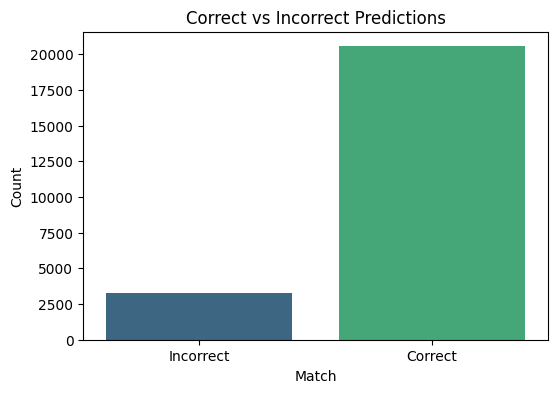

In [ ]:
# Tạo DataFrame với Actual và Predicted
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Tạo cột để kiểm tra dự đoán đúng/sai
comparison_df['Match'] = comparison_df['Actual'] == comparison_df['Predicted']

# Tính toán số lượng đúng/sai
match_counts = comparison_df['Match'].value_counts()

# Trực quan hóa số lượng
plt.figure(figsize=(6, 4))
sns.barplot(x=match_counts.index, y=match_counts.values, palette='viridis')
plt.xticks([0, 1], ['Incorrect', 'Correct'])
plt.ylabel('Count')
plt.title('Correct vs Incorrect Predictions')
plt.show()